In [221]:
import mdptoolbox
import random
from hiive.mdptoolbox.mdp import QLearning
import mdptoolbox.example
import numpy as np
import matplotlib.pyplot as plt
random.seed(0)
np.random.seed(0)

In [262]:
# Value Iteration

nStates = 18 
reward1 = nStates * 3
reward2 = 2
prob_burn = 0.001
P, R = mdptoolbox.example.forest(S=nStates, r1=reward1, r2=reward2, p=prob_burn) #prob_burn
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.8) #discount
#vi.setVerbose()
vi.run()
print(vi.policy)
print('Iterations needed: ', vi.iter)
print('Time needed: ', vi.time)


(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Iterations needed:  21
Time needed:  0.0


In [233]:
# Iterations vs number of states
iter_to_converge = []
nStates = 100

for i in range(nStates):
    P, R = mdptoolbox.example.forest(S=i+3, r1=(i+3)*3, r2=2, p=0.001) #prob_burn
    vi2 = mdptoolbox.mdp.ValueIteration(P, R, 0.8) #discount
    #vi.setVerbose()
    vi2.run()
    iter_to_converge.append(vi2.iter)

print(iter_to_converge)
#print('Iterations needed: ', vi2.iter)
#print('Time needed: ', vi2.time)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 24, 26, 29, 33, 46, 46, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53]


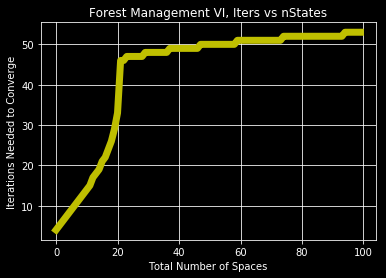

In [232]:
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('Forest Management VI, Iters vs nStates')
plt.xlabel('Total Number of Spaces')
plt.ylabel('Iterations Needed to Converge')
plt.plot(range(len(iter_to_converge)), iter_to_converge, c = 'y', lw=7)
plt.savefig('FM_VI_itersAndStates.png')

In [225]:
# Policy Iteration

nStates = 100
reward1 = nStates * 3
reward2 = 2
prob_burn = 0.001
P, R = mdptoolbox.example.forest(S=nStates, r1=reward1, r2=reward2, p=prob_burn) #prob_burn
pi = mdptoolbox.mdp.PolicyIteration(P, R, 0.8) #discount
#pi.setVerbose()
pi.run()
print(pi.policy)
print('Iterations needed: ', pi.iter)
print('Time needed: ', pi.time)
error = np.mean(np.array(vi.policy) != np.array(pi.policy))
print('Error with optimal VI policy: ', error)

(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Iterations needed:  29
Time needed:  0.009002208709716797
Error with optimal VI policy:  0.0


In [234]:
# Iterations vs number of states
iter_to_converge = []
nStates = 100

for i in range(nStates):
    P, R = mdptoolbox.example.forest(S=i+3, r1=(i+3)*3, r2=2, p=0.001) #prob_burn
    pi2 = mdptoolbox.mdp.PolicyIteration(P, R, 0.8) #discount
    #pi.setVerbose()
    pi2.run()
    iter_to_converge.append(pi2.iter)

print(iter_to_converge)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29]


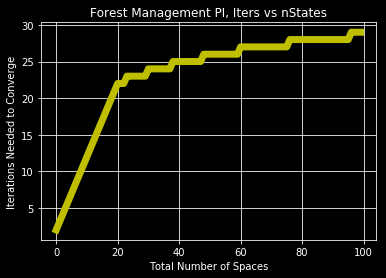

In [235]:
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('Forest Management PI, Iters vs nStates')
plt.xlabel('Total Number of Spaces')
plt.ylabel('Iterations Needed to Converge')
plt.plot(range(len(iter_to_converge)), iter_to_converge, c = 'y', lw=7)
plt.savefig('FM_PI_itersAndStates.png')

In [264]:
# Q-learning

nStates = 5
reward1 = nStates * 3
reward2 = 2
prob_burn = 0.001
P, R = mdptoolbox.example.forest(S=nStates, r1=reward1, r2=reward2, p=prob_burn) #prob_burn
ql = QLearning(P, R, 0.9, alpha=0.05, alpha_decay=0.99, alpha_min=0.0001,
                 epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.999,
                 n_iter=100000, skip_check=False, iter_callback=None,
                 run_stat_frequency=None) #discount
ql.run()
print(ql.policy)
#print(ql.V)
print('Time needed: ', ql.time)
error = np.mean(np.array(vi.policy) != np.array(ql.policy))
print('Error with optimal VI policy: ', error)

(0, 1, 1, 0, 0)
Time needed:  2.364871025085449
Error with optimal VI policy:  1.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  app.launch_new_instance()


In [255]:
nStates = 100
reward1 = nStates * 3
reward2 = 2
prob_burn = 0.001

all_error = []
all_time = []
X = [10000, 20000, 40000, 80000, 150000, 300000, 500000]
for n in X:
    P, R = mdptoolbox.example.forest(S=nStates, r1=reward1, r2=reward2, p=prob_burn) #prob_burn
    ql = QLearning(P, R, 0.9, alpha=0.1, alpha_decay=0.99, alpha_min=(10.0/n),
                     epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.999,
                     n_iter=n, skip_check=False, iter_callback=None,
                     run_stat_frequency=None) #discount
    ql.run()
    #print(ql.policy)
    #print(ql.V)
    print('Time needed: ', ql.time)
    error = np.mean(np.array(vi.policy) != np.array(ql.policy))
    print('Error with optimal VI policy: ', error)
    all_error.append(error)
    all_time.append(ql.time)
print('Done.')

Time needed:  0.2895803451538086
Error with optimal VI policy:  0.59
Time needed:  0.5627331733703613
Error with optimal VI policy:  0.53
Time needed:  1.0502464771270752
Error with optimal VI policy:  0.48
Time needed:  2.0774710178375244
Error with optimal VI policy:  0.47
Time needed:  3.7217180728912354
Error with optimal VI policy:  0.44
Time needed:  7.406853437423706
Error with optimal VI policy:  0.38
Time needed:  12.227700471878052
Error with optimal VI policy:  0.36
Done.


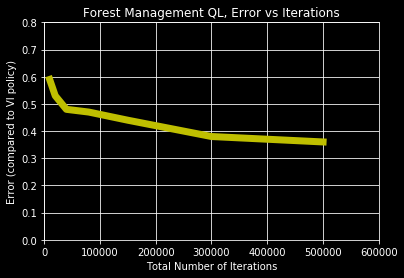

In [257]:
plt.style.use('dark_background')
ax=plt.axes()
ax.set(xlim=(0, 600000), ylim=(0, 0.8))
ax.grid()
plt.title('Forest Management QL, Error vs Iterations')
plt.xlabel('Total Number of Iterations')
plt.ylabel('Error (compared to VI policy)')
plt.plot(X, all_error, c = 'y', lw=7)
plt.savefig('FM_QL_errorAndIters.png')